# Assignment 1 - A Star Search - Python Code

The following code has been completed using the instructions contained in the assignment document.

In [22]:
import numpy as np
from node import Node
from queue import PriorityQueue # https://docs.python.org/3/library/queue.html
from maps import DiscreteMap

import sys # for size calculation


# Algorithms

In [23]:
# You may uncomment/comment this code to experiment with a different heuristic.

# Added Chebyshev Distance

def distance(node1, node2):
    #Euclidian_distance
    return np.sqrt((node1.x - node2.x)**2+(node1.y - node2.y)**2)

# def distance(node1, node2):
#     # Manhattan_distance
#     return np.abs(node1.x - node2.x) + np.abs(node1.y - node2.y)

# def distance(node1, node2):
#     #Chebyshev_distance
#     return max(np.abs(node1.x - node2.x), np.abs(node1.y - node2.y))

def heuristic(node1, node2):
    return distance(node1, node2)


In [24]:
def A_star(game_map, start_node, goal_node):
    
    open_queue = PriorityQueue() # priorityq method call added 
    path = [start_node]
    f = 0
    open_queue.put((f, (start_node, path)))
    
    discovered_nodes = set()
    has_printed_data = False # flag for print statement later
    
    while not open_queue.empty():
        cost, (current_node, path) = open_queue.get()
        
        if not current_node in discovered_nodes:
            discovered_nodes.add(current_node)

            # goal reached
            if current_node == goal_node:
                cost_to_reach_goal_node = 0
                for i in range(len(path) - 1):
                    cost_to_reach_goal_node += distance(path[i], path[i+1])
                message = f"Successfully [{goal_node.x}, {goal_node.y}] in {cost_to_reach_goal_node:.2f} moves"
                return path, len(discovered_nodes), cost_to_reach_goal_node, message, sys.getsizeof(discovered_nodes) # added return of [path, discovered_nodes, cost]
            
            
            
            # Generate children and add to path
            for new_node in game_map.get_adjacent_nodes(current_node):
                new_path = path.copy()
                new_path.append(new_node)
                
                # Cost to reach that node
                g = 0
                for i in range(len(new_path) - 1):
                    g += distance(new_path[i], new_path[i+1]) # Switched `path` to `new_path`
                    
                h = heuristic(new_node, goal_node)
                f = g + h
                
                # added conditional printer statement for f,g, and h using flag checker.
                if has_printed_data is not True:
                    print(f"Values of f(N) = g(N) + h(N) at [{new_node.x},{new_node.y}]:\nf:{f:.3f}\ng:{g}\nh:(sqrt(({np.abs(goal_node.x - new_node.x)}^2) + ({np.abs(goal_node.y - new_node.y)}^2)) = {h:.3f})\n\n")
                    has_printed_data = True
                                    
                open_queue.put((f, (new_node, new_path)))
    return None

# Discrete Grid Search

In [25]:
# added dimensions
map_height = 40
map_width = 40

In [26]:
game_map = DiscreteMap(map_height, map_width)

## Search 1

Values of f(N) = g(N) + h(N) at [0,28]:
f:49.010
g:1.0
h:(sqrt((39^2) + (28^2)) = 48.010)


Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (5, 27)
Obstacle encoutered at: (6, 26)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (10, 20)
Obstacle encoutered at: (10, 21)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (5, 27)
Obstacle encoutered at: (5, 27)
Obstacle encoutered at: (6, 26)
Obstacle encoutered at: (6, 27)
Obstacle encoutered at: (6, 26)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (7, 26)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (10, 21)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (10, 23)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (5, 27)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (10, 18)
Obstacle encoutered at: (10, 19)
Obstacle encoutered at: (10, 20)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (10, 23)
O

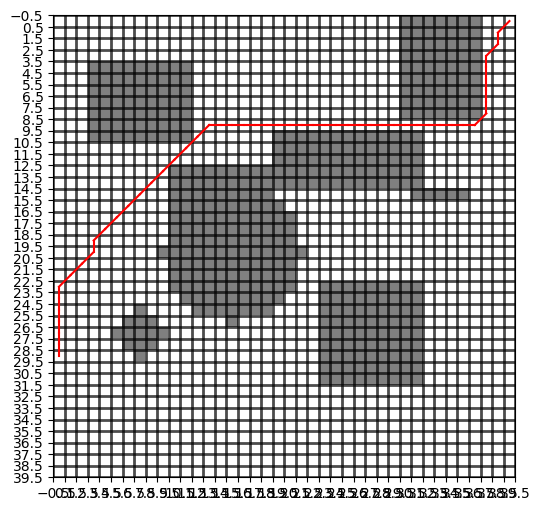

In [27]:

# binding start position to lower left, and goal node in the upper right
path, discovered_nodes, cost, confirmation, disc_node_size = A_star(game_map, Node(0, 29), Node(39, 0))


# initial message when agent reaches goal node
print(confirmation)

# filled print statements with relevant information and formatted appropriately.
print(f"Discovered Nodes: {discovered_nodes}")
print(f"Total cost of travel: {cost:.5f}")

# for memory calculation
print(f"Size of Discovered nodes (bytes): {disc_node_size}")

game_map.plot_path(path)

## Search 2

Values of f(N) = g(N) + h(N) at [0,19]:
f:40.013
g:1.0
h:(sqrt((39^2) + (1^2)) = 39.013)


Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (10, 18)
Obstacle encoutered at: (10, 19)
Obstacle encoutered at: (10, 20)
Obstacle encoutered at: (9, 20)
Obstacle encoutered at: (10, 20)
Obstacle encoutered at: (10, 21)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (10, 17)
Obstacle encoutered at: (10, 18)
Obstacle encoutered at: (10, 19)
Obstacle encoutered at: (10, 21)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (10, 23)
Obstacle encoutered at: (10, 16)
Obstacle encoutered at: (10, 17)
Obstacle encoutered at: (10, 18)
Obstacle encoutered at: (10, 22)
Obstacle encoutered at: (10, 23)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (7, 25)
Obstacle encoutered at: (10, 15)
Obstacle encoutered at: (10, 16)
Obstacle encoutered at: (1

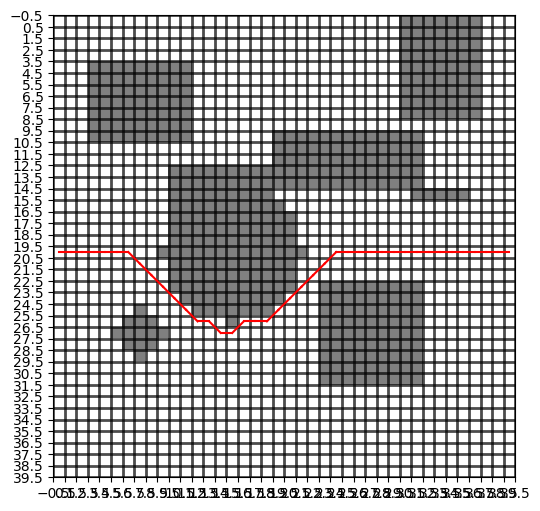

In [28]:
# 'agent' starts and ends in the middle of the map, on either side
# typos fixed

path, discovered_nodes, cost, confirmation, disc_node_size = A_star(game_map, Node(0, 20), Node(39, 20))


# initial message when agent reaches goal node
print(confirmation)

# filled print statements with relevant information and formatted appropriately.
print(f"Discovered Nodes: {discovered_nodes}")
print(f"Total cost of travel: {cost:.5f}")

# for memory calculation
print(f"Size of Discovered nodes (bytes): {disc_node_size}")

game_map.plot_path(path)